### Seaborn 
Built on top of matplotlib

### Matplotlib vs Seaborn
1. Matplotlib makes easy things easy and hard things possible.
2. Seaborn tries to make a well-defined set of hard things easy too.
<br>

#### Two major problems faced by Matplotlib
   * Default Matplotlib parameters
   * Working with data frames
   
 #### Important Features of Seaborn
* Built in themes for styling matplotlib graphics
* Visualizing univariate and bivariate data
* Fitting in and visualizing linear regression models
* Plotting statistical time series data
* Seaborn works well with NumPy and Pandas data structures
* It comes with built in themes for styling Matplotlib graphics

### Installation of  Seaborn
#### Using PIP
pip install seaborn
#### Using Anaconda
conda install seaborn

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Importing Datasets

In [2]:
sb.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [3]:
df = sb.load_dataset('tips')
df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


##### Unlike Matplotlib, Seaborn comes packed with customized themes and a high-level interface for customizing and controlling the look of Matplotlib figures.

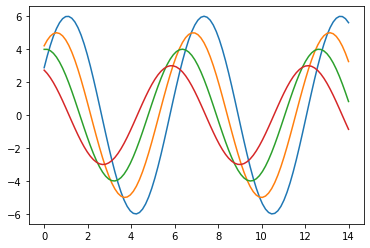

In [4]:
def sinplot(flip = 1):
   x = np.linspace(0, 14, 100)
   for i in range(1, 5): 
      plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
sinplot()

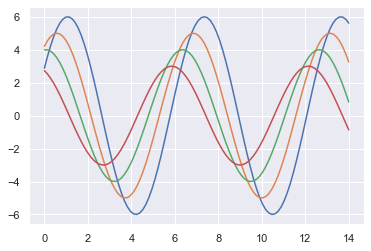

In [5]:
sb.set()
sinplot()

##### Basically, Seaborn splits the Matplotlib parameters into two groups

* Plot styles
* Plot scale

### Seaborn Figure Styles
The interface for manipulating the styles is set_style(). Using this function you can set the theme of the plot. Seaborn has five themes available.

* Darkgrid
* Whitegrid
* Dark
* White
* Ticks

##### Example:

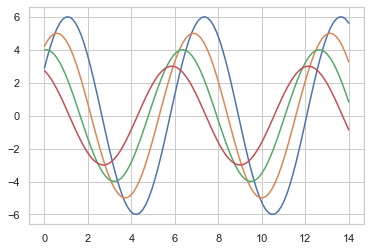

In [6]:
sb.set_style("whitegrid")
sinplot()

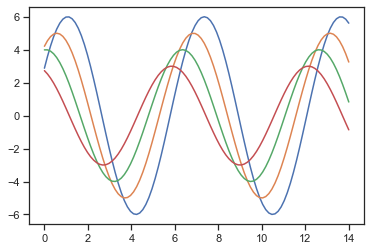

In [7]:
sb.set_style("ticks")
sinplot()

#### Removing Axes Spines
In the white and ticks themes, we can remove the top and right axis spines using the despine() function.


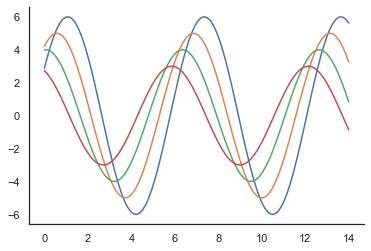

In [8]:
sb.set_style("white")
sinplot()
sb.despine()

##### Scaling Plot Elements
We also have control on the plot elements and can control the scale of plot using the set_context() function. We have four preset templates for contexts, based on relative size, the contexts are named as follows

* Paper
* Notebook
* Talk
* Poster

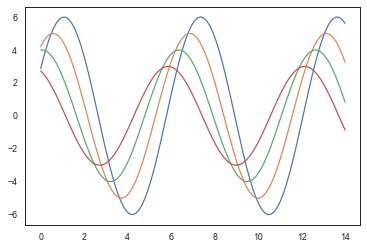

In [9]:
sb.set_context("paper")
sinplot()

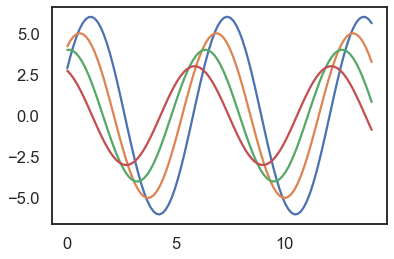

In [10]:
sb.set_context("talk")
sinplot()

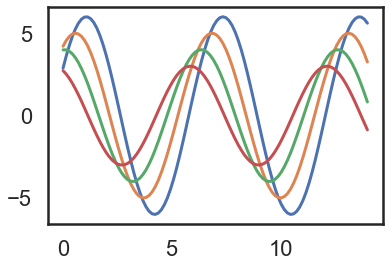

In [11]:
sb.set_context("poster")
sinplot()

##### Building Color Palette
Seaborn provides a function called set_palette(), 
which can be used to give colors to plots and adding more aesthetic value to it.

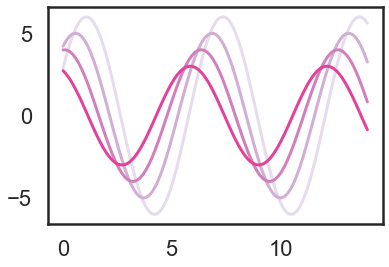

In [12]:
sb.set_palette("PuRd")
sinplot()

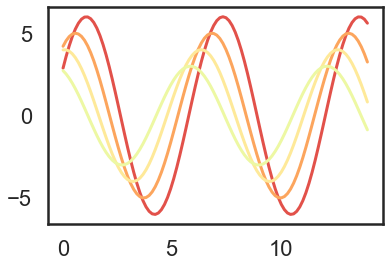

In [13]:
sb.set_palette("Spectral")
sinplot()

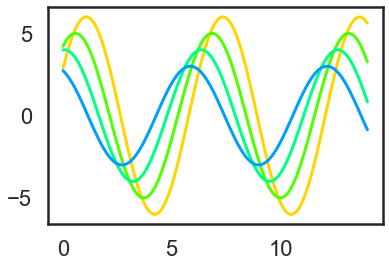

In [14]:
sb.set_palette("hsv")
sinplot()

### Plotting Univariate Distribution
Function distplot() provides the most convenient way to take a quick look at univariate distribution. This function will plot a histogram that fits the kernel density estimation of the data.

In [15]:
df = sb.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='petal_length'>

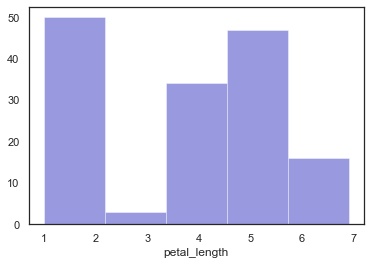

In [18]:
sb.set_context('notebook')
sb.set_palette("seismic")
sb.distplot(df['petal_length'],kde = False)

<AxesSubplot:xlabel='petal_length', ylabel='Density'>

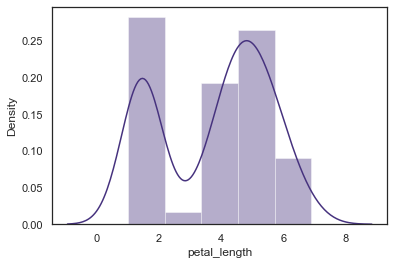

In [23]:
sb.set_context('notebook')
sb.set_palette("viridis")
sb.distplot(df['petal_length'])

KDE(Kernel density estimation) is a technique that let’s you create a smooth curve given a set of data.

<AxesSubplot:xlabel='petal_length', ylabel='Density'>

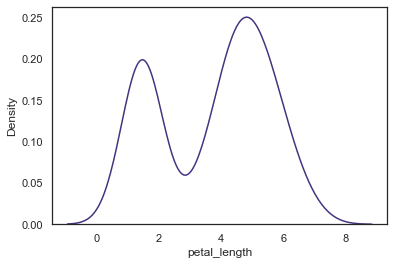

In [24]:
sb.distplot(df['petal_length'],hist=False)

### Plotting Bivariate Distribution
Bivariate Distribution is used to determine the relation between two variables. This mainly deals with relationship between two variables and how one variable is behaving with respect to the other.

##### Scatter plot

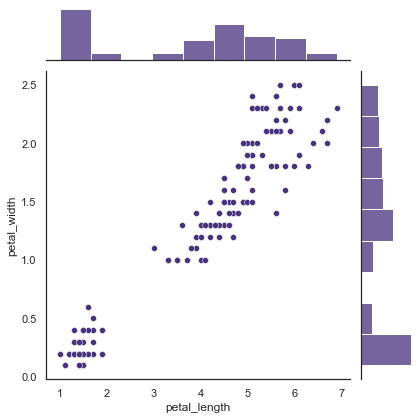

In [25]:
sb.jointplot(x = 'petal_length',y = 'petal_width',data = df)

##### Hexbin plot

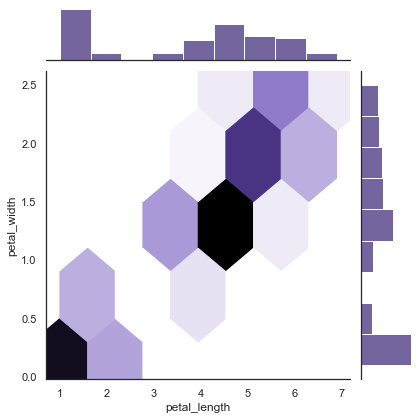

In [28]:
sb.jointplot(x = 'petal_length',y = 'petal_width',data = df,kind='hex')

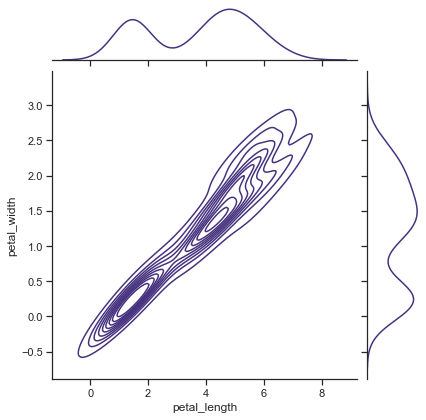

In [34]:
sb.jointplot(x = 'petal_length',y = 'petal_width',data = df,kind = 'kde',palette = "husl")


##### Pairplot
To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This shows the relationship for (n,2) combination of variable in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots.

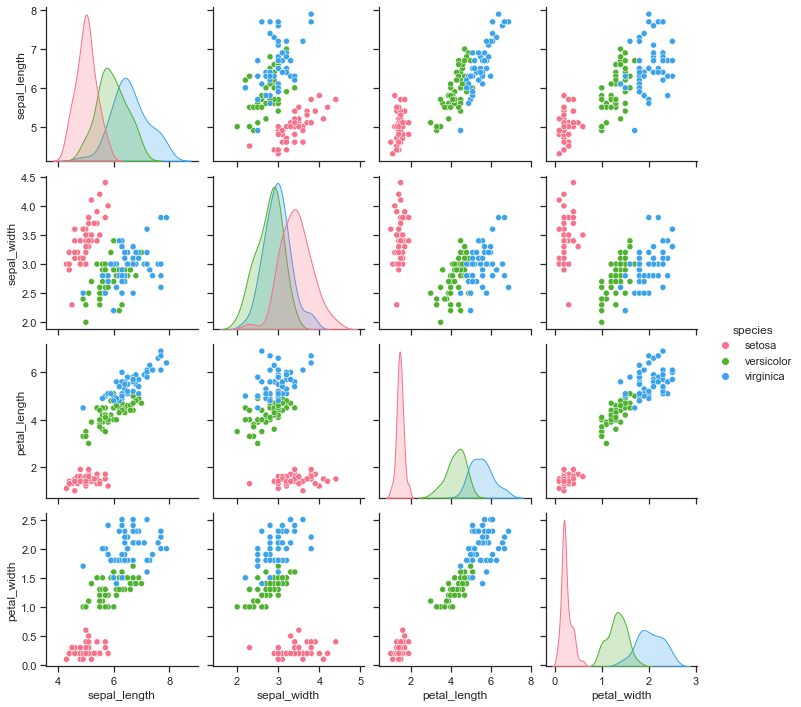

In [33]:
sb.set_style("ticks")
sb.pairplot(df,hue = 'species',diag_kind = "kde",kind = "scatter",palette = "husl")

#### What happens when we plot bivariate relationships in scatter plot where one of the variable is categorical?

<AxesSubplot:xlabel='species', ylabel='petal_length'>

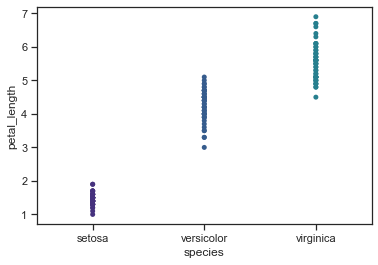

In [43]:
sb.stripplot(x = "species", y = "petal_length", data = df,jitter=False)

In the above plot, we can clearly see the difference of petal_length in each species. But, the major problem with the above scatter plot is that the points on the scatter plot are overlapped. We use the ‘Jitter’ parameter to handle this kind of scenario.

Jitter adds some random noise to the data. This parameter will adjust the positions along the categorical axis.

<AxesSubplot:xlabel='species', ylabel='petal_length'>

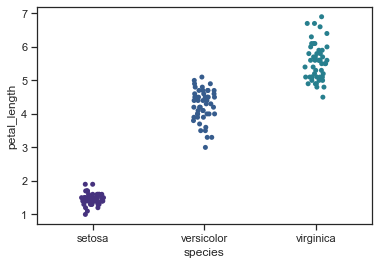

In [44]:
sb.stripplot(x = "species", y = "petal_length", data = df,jitter=True)

##### Boxplot
Boxplot is a convenient way to visualize the distribution of data through their quartiles.

Box plots usually have vertical lines extending from the boxes which are termed as whiskers. These whiskers indicate variability outside the upper and lower quartiles, hence Box Plots are also termed as box-and-whisker plot and box-and-whisker diagram. Any Outliers in the data are plotted as individual points.

<AxesSubplot:xlabel='species', ylabel='petal_length'>

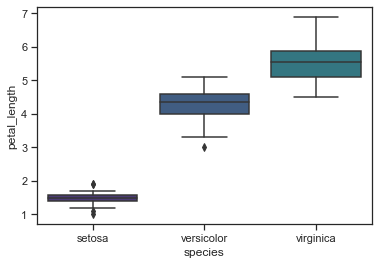

In [45]:
sb.boxplot(x = "species", y = "petal_length", data = df)

##### Violin Plot
Violin Plots are a combination of the box plot with the kernel density estimates. So, these plots are easier to analyze and understand the distribution of the data.

Let us use tips dataset called to learn more into violin plots. This dataset contains the information related to the tips given by the customers in a restaurant.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

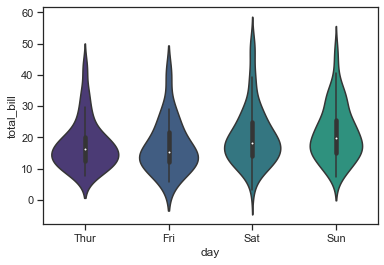

In [46]:
df = sb.load_dataset('tips')
sb.violinplot(x = "day", y = "total_bill", data=df)

If we want to see how the distribution behaves with respect to sex, lets explore it in below example.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

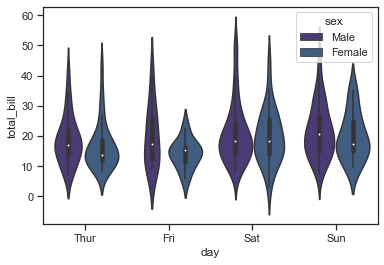

In [47]:
sb.violinplot(x = "day", y = "total_bill",hue = 'sex', data = df)

##### Bar plot
Bar plot represents the estimate of central tendency. Let us use the ‘titanic’ dataset to learn bar plots.

In [54]:
df = sb.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<AxesSubplot:xlabel='sex', ylabel='survived'>

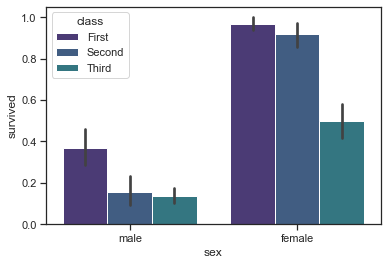

In [55]:
sb.barplot(x = "sex", y = "survived", hue = "class", data = df)

##### Count plot
A special case in barplot is to show the no of observations in each category rather than computing a statistic for a second variable. For this, we use countplot().

<AxesSubplot:xlabel='sex', ylabel='count'>

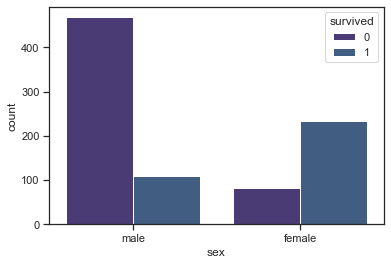

In [59]:
sb.countplot(hue = "survived", x = "sex", data = df)

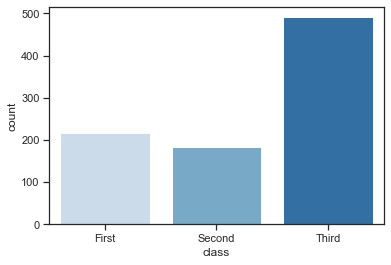

In [61]:
sb.countplot(x = "class", data = df, palette = "Blues");

##### Point Plots
Point plots serve same as bar plots but in a different style. Rather than the full bar, the value of the estimate is represented by the point at a certain height on the other

<AxesSubplot:xlabel='sex', ylabel='survived'>

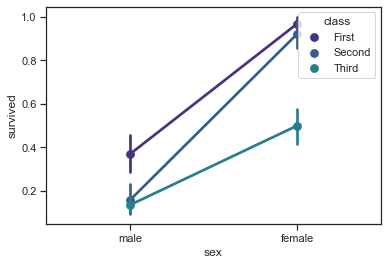

In [62]:
sb.pointplot(x = "sex", y = "survived", hue = "class", data = df)

<AxesSubplot:xlabel='class', ylabel='survived'>

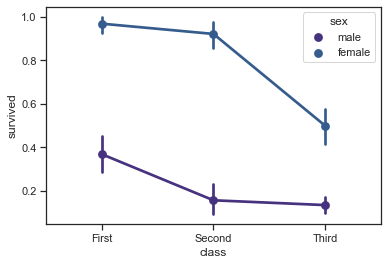

In [63]:
sb.pointplot(x = "class", y = "survived", hue = "sex", data = df)

##### Factor plot
Factorplot draws a categorical plot on a FacetGrid. Using ‘kind’ parameter we can choose the plot like boxplot, violinplot, barplot and stripplot. FacetGrid uses pointplot by default.

In [66]:
df = sb.load_dataset('exercise')
df

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
...,...,...,...,...,...,...
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running


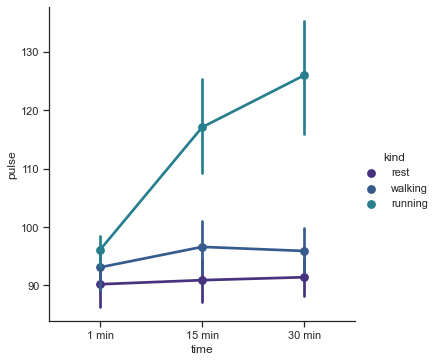

In [67]:
sb.factorplot(x = "time", y = 'pulse', hue = "kind",data = df);

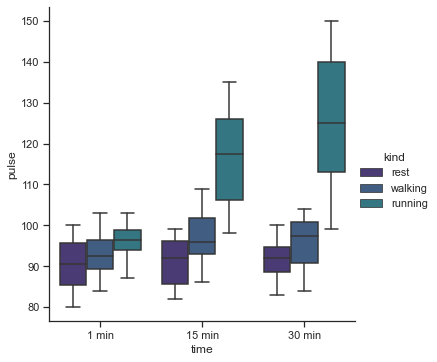

In [68]:
sb.factorplot(x = "time", y = 'pulse', hue = "kind",data = df,kind='box');